# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [2]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [3]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

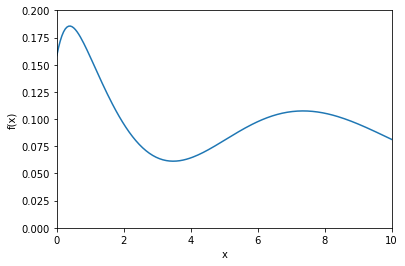

In [4]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [5]:
def genSample(npts):
    sample = []
    # YOUR CODE HERE
    m = 0.2 #value that fulfills the necessary condition that m>=f(x) for all x
    while True: #keep generating sample until the sample has enough points
        randx = numpy.random.uniform(0, 10) #generates a random number within the integration limits for which the probability is defined
        r = random.random() #generates a uniformly generated random number between 1 and 0 
        
        if (len(sample) == npts): #if sample generated is of sufficient size, exit the function
            return numpy.array(sample) 
        
        else:
            if (m*r < f(randx)):
                sample.append(randx)
    #return numpy.array(sample)

In [6]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


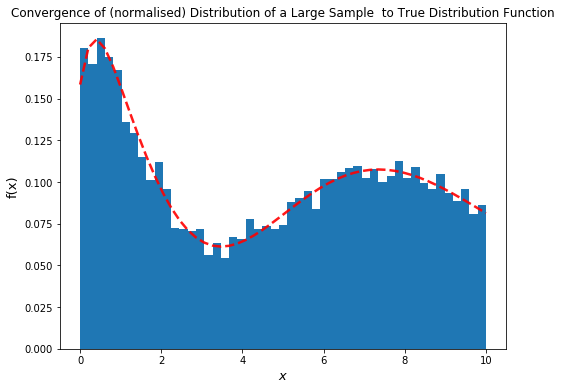

In [20]:
npts = 10000
x_graph = numpy.linspace(0, 10)
plt.figure(figsize = (8,6))
plt.xlabel('$x$', fontsize = 13)
plt.ylabel('f(x)', fontsize = 13)
plt.title('Convergence of (normalised) Distribution of a Large Sample  to True Distribution Function')

f_graph  = f(x_graph)
sample_graph = genSample(npts)

assert (len(f_graph) == len(x_graph))
plt.hist(sample_graph, bins = x_graph, density = True);
plt.plot(x_graph, f_graph, color = 'red', alpha = 0.9, linestyle = '--', linewidth = 2.5);